# CLUSTERING PRACTICAL





## Import tools

please import others if needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.spatial
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, load_breast_cancer


## Data: generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters.

In [2]:
# X0 = [np.random.random(25)+0]
# X1 = [np.random.random(25)+2]
# X2 = [np.random.random(25)+4]
# X3 = [np.random.random(25)+6]

# X = np.concatenate([X0,X1,X2,X3])

# Y0 = [np.random.random(25)+0]
# Y1 = [np.random.random(25)+2]
# Y2 = [np.random.random(25)+4]
# Y3 = [np.random.random(25)+6]

# Y = np.concatenate([Y0,Y1,Y2,Y3])


data1 =   np.random.rand(25,2)  #0 to 1
data2 = 2+np.random.rand(25,2)  #2 to 3
data3 = 4+np.random.rand(25,2)  #4 to 5
data4 = 6+np.random.rand(25,2)  #6 to 7

data= np.concatenate((data1,data2,data3,data4))

label1 = np.zeros(25)
label2 = np.zeros(25)+1
label3 = np.zeros(25)+2
label4 = np.zeros(25)+3

label= np.concatenate((label1,label2,label3,label4))
print(label)
print(data)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]
[[9.59552601e-01 3.50859516e-01]
 [1.81638032e-01 3.14136861e-01]
 [1.92386379e-03 3.13689023e-02]
 [3.13124772e-01 2.51134455e-02]
 [2.04732955e-01 3.68123289e-01]
 [3.35427258e-01 7.93077111e-01]
 [6.30252576e-01 8.91561323e-01]
 [7.06861310e-01 7.63236588e-01]
 [2.78328399e-01 8.24780465e-01]
 [4.14224849e-01 7.62780741e-02]
 [1.24558906e-01 9.94838521e-01]
 [3.06123511e-01 2.01042623e-01]
 [5.63007437e-01 9.77863893e-01]
 [8.15100357e-01 6.72904723e-01]
 [2.54219479e-02 5.69476283e-01]
 [4.86354596e-01 9.32066962e-02]
 [5.45645585e-01 5.62578436e-02]
 [8.31839314e-01 3.23091459e-01]
 [6.93648410e-01 5.25798791e-01]
 [6.46390543e-01 2.06246056e-01]
 [2.34378000e-01 5.50329190e-01]
 

Display the set with one color per cluster using the scatter function from matplotlib.pyplot

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]


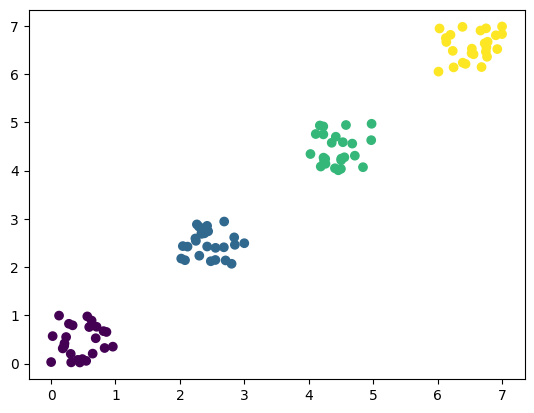

In [3]:
print(label)
plt.scatter(data[:,0],data[:,1],c=label)

## Baseline: the random clustering algorithm

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point.

In [4]:
 pred=np.random.randint(0,4,100)
 print(pred)

[2 3 0 2 2 2 0 0 3 3 1 2 1 0 2 2 1 3 3 2 0 0 0 0 2 0 2 0 3 0 3 1 0 0 2 0 0
 3 2 3 3 2 2 2 2 3 0 0 3 3 0 2 0 3 1 3 0 3 0 3 0 1 0 2 2 1 1 0 3 2 0 2 2 0
 3 2 2 1 3 3 3 1 3 1 0 1 1 1 0 2 1 3 3 2 0 3 0 0 0 0]


## Metric: the rand index

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [5]:
tp=0
tn=0
for i in range(100):
    for j in range(i+1,100):
            tp= tp +((pred[i]==pred[j]) and (label[i]==label[j]))
            tn= tn +((pred[i]!=pred[j]) and (label[i]!=label[j]))
ri=2*(tp + tn)/(100*(100-1))
print('tp ',tp,' tn ',tn,' ri ',ri) #ri should be close to 0.6

tp  303  tn  2770  ri  0.6208080808080808


Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

In [6]:
ag = np.zeros(100)
for runs in range(100):
    pred=np.random.randint(0,4,100)
    tp=0
    tn=0
    for i in range(100):
        for j in range(i+1,100):
                tp= tp +((pred[i]==pred[j]) and (label[i]==label[j]))
                tn= tn +((pred[i]!=pred[j]) and (label[i]!=label[j]))
    ri=2*(tp + tn)/(100*(100-1))
    print('tp ',tp,' tn ',tn,' ri ',ri) #ri should be close to 0.6
    #avg=avg+ri
    ag [runs] = ri
print('avg ri ',sum(ag)/100) #ri should be close to 0.6
print(ag)
ag_random = sum(ag)/100


tp  284  tn  2799  ri  0.6228282828282828
tp  310  tn  2851  ri  0.6385858585858586
tp  312  tn  2815  ri  0.6317171717171717
tp  288  tn  2801  ri  0.6240404040404041
tp  313  tn  2796  ri  0.6280808080808081
tp  300  tn  2849  ri  0.6361616161616162
tp  295  tn  2820  ri  0.6292929292929293
tp  289  tn  2747  ri  0.6133333333333333
tp  296  tn  2813  ri  0.6280808080808081
tp  308  tn  2781  ri  0.6240404040404041
tp  317  tn  2806  ri  0.6309090909090909
tp  321  tn  2824  ri  0.6353535353535353
tp  294  tn  2833  ri  0.6317171717171717
tp  315  tn  2832  ri  0.6357575757575757
tp  294  tn  2835  ri  0.6321212121212121
tp  319  tn  2784  ri  0.6268686868686869
tp  282  tn  2815  ri  0.6256565656565657
tp  361  tn  2853  ri  0.6492929292929293
tp  330  tn  2843  ri  0.641010101010101
tp  283  tn  2797  ri  0.6222222222222222
tp  314  tn  2773  ri  0.6236363636363637
tp  306  tn  2841  ri  0.6357575757575757
tp  297  tn  2824  ri  0.6305050505050505
tp  298  tn  2817  ri  0.6292929292

Display results and compute the mean and standard deviation.

mean =  0.6294262626262627
standard deviation =  0.005850096252250532


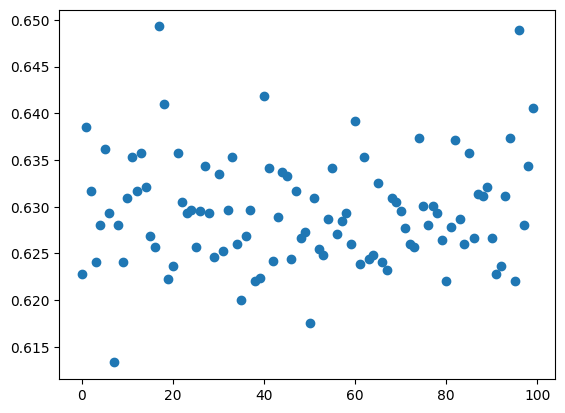

In [7]:
plt.scatter(range(100),ag)
print('mean = ', np.mean(ag))
print('standard deviation = ', np.std(ag))

## Hierarchical Clustering

Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance

In [8]:
euc = scipy.spatial.distance.pdist(data, metric='euclidean')
print(euc)
np.shape(euc)

[0.77878086 1.00951823 0.72386424 ... 0.52689446 0.28243892 0.39593905]


(4950,)

Display and interpret its shape

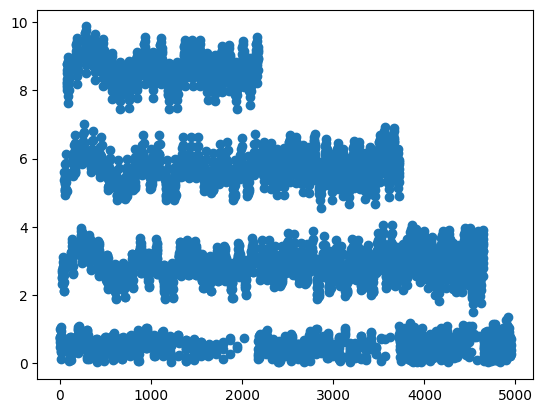

In [9]:
plt.scatter(range(len(euc)), euc)

The shape is a matrix (4950,). It indicates all distance between two points, what would be the binomial coefficiant 100 over 2.

Compute the single link hierarchical clustering using the linkage function from scipy.cluster.hierarchy.

In [10]:
Z = linkage(data, 'single')
#print(Z)


Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

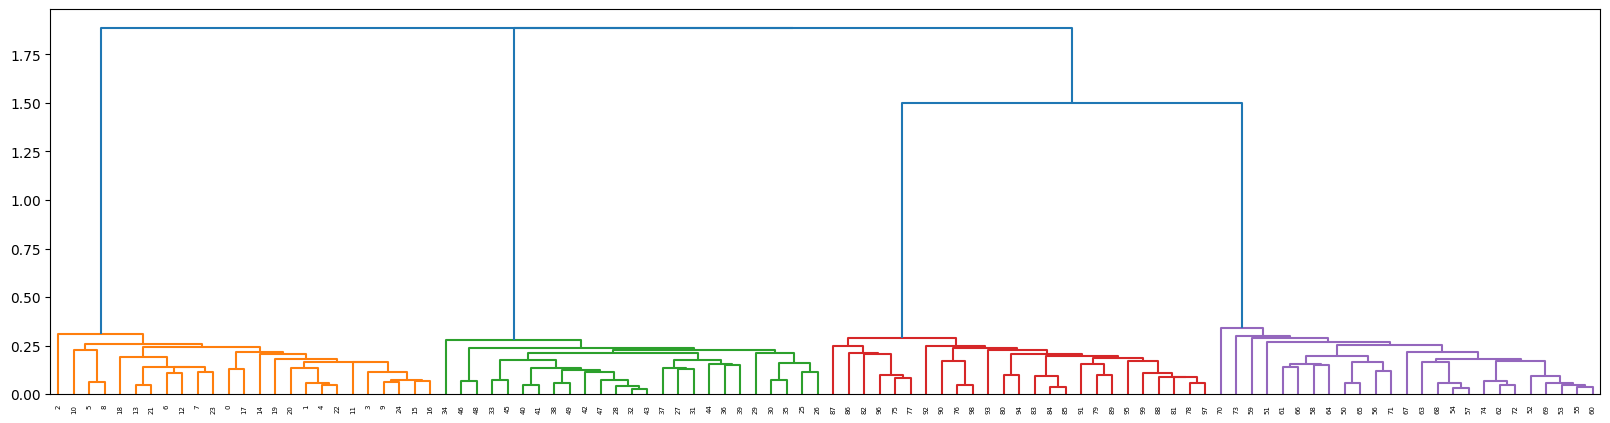

In [11]:
fig = plt.figure(figsize=(20, 5))
dn = dendrogram(Z)
plt.show()

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from scipy.cluster.hierarchy.

In [12]:
fcluster(Z, t=4, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [13]:
ag = np.zeros(100)
for runs in range(100):
    Z = linkage(data, 'single')
    pred=fcluster(Z, t=4, criterion='maxclust')
    tp=0
    tn=0
    for i in range(100):
        for j in range(i+1,100):
                tp= tp +((pred[i]==pred[j]) and (label[i]==label[j]))
                tn= tn +((pred[i]!=pred[j]) and (label[i]!=label[j]))
    ri=2*(tp + tn)/(100*(100-1))
    #avg=avg+ri
    ag [runs] = ri
print('avg ri ',sum(ag)/100)
print(ag)
ag_hierarchy = sum(ag)/100

avg ri  1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Display results and compute the mean and standard deviation.

mean =  1.0
standard deviation =  0.0


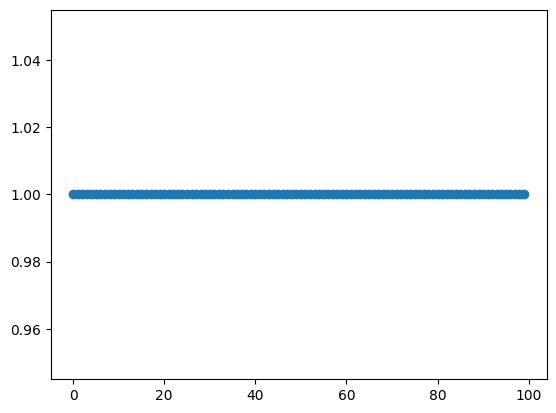

In [14]:
plt.scatter(range(100),ag)
print('mean = ', np.mean(ag))
print('standard deviation = ', np.std(ag))

Explain why the standard deviation is 0.

It is deterministic.

## Partitional Clustering

Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

In [15]:

kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
print(kmeans.labels_)
kmeans.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


array([[4.43634356, 4.43369455],
       [0.45631281, 0.45853703],
       [6.54068305, 6.58026018],
       [2.44442231, 2.48858664]])

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [16]:
ag = np.zeros(100)
for runs in range(100):
    pred=KMeans(n_clusters=4, random_state=0).fit(data)
    tp=0
    tn=0
    for i in range(100):
        for j in range(i+1,100):
                tp= tp +((pred.labels_[i]==pred.labels_[j]) and (label[i]==label[j]))
                tn= tn +((pred.labels_[i]!=pred.labels_[j]) and (label[i]!=label[j]))
    ri=2*(tp + tn)/(100*(100-1))
    #avg=avg+ri
    ag [runs] = ri
print('avg ri ',sum(ag)/100)
print(ag)
ag_partitional = sum(ag)/100

avg ri  1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Display results and compute the mean and standard deviation.

mean =  1.0
standard deviation =  0.0


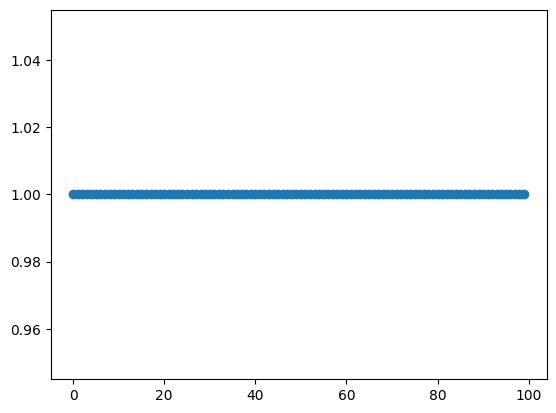

In [17]:
plt.scatter(range(100),ag)
print('mean = ', np.mean(ag))
print('standard deviation = ', np.std(ag))

## Performance Analysis

Display the performance of the 3 clustering algorithms on the synthetic dataset using the bar function from matplotlib.pyplot.

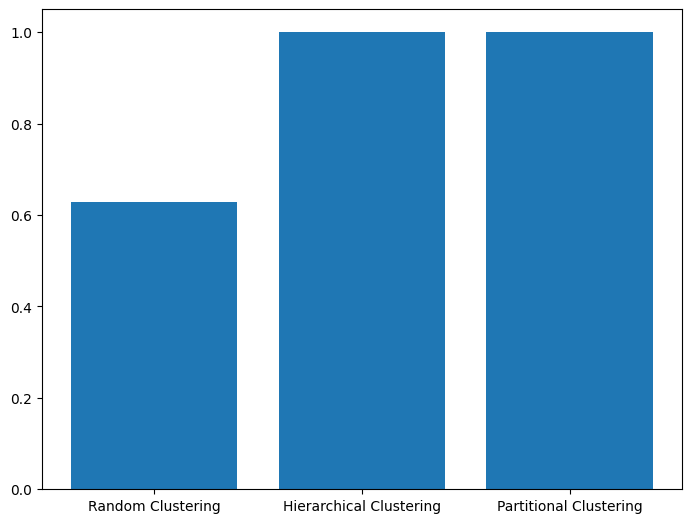

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Random Clustering', 'Hierarchical Clustering', 'Partitional Clustering']
performances = [ag_random, ag_hierarchy, ag_partitional]
ax.bar(langs,performances)
plt.show()

Load the iris dataset using the load_iris function from scikit-learn and perform the same performance analysis using this dataset.

8
avg ri  0.5572062639821029


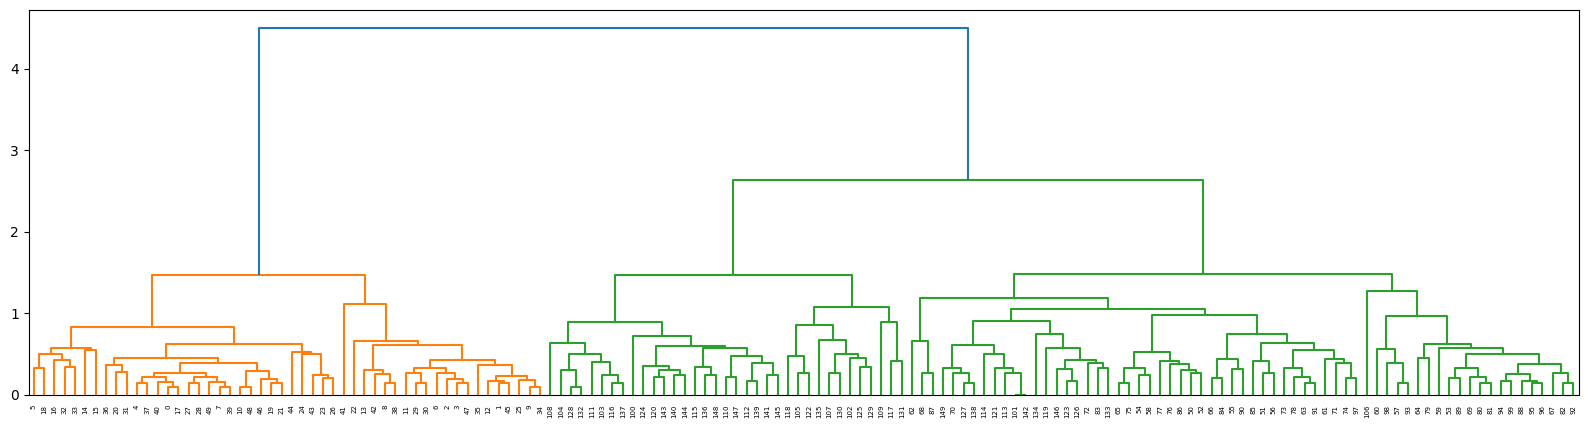

avg ri  0.8217449664429505
avg ri  0.8737360178970904


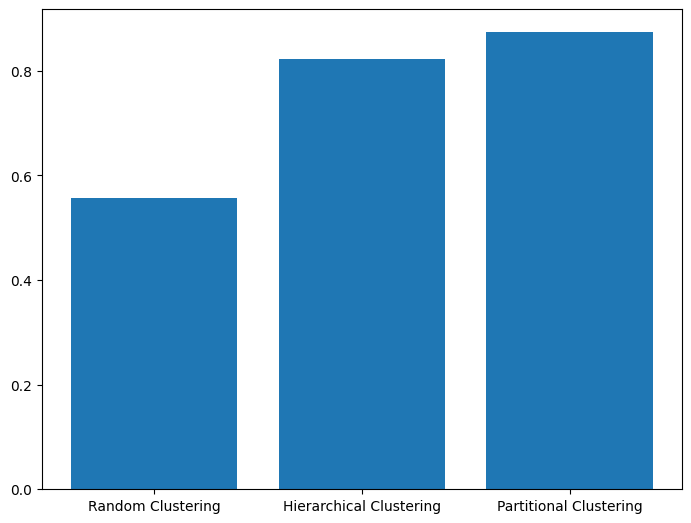

In [19]:
data = load_iris()
data.target[[10, 25, 50]]
list(data.target_names)
print(len(data))
N=150

#Random
labelrand = data.target
ag = np.zeros(N)
for runs in range(N):
    pred=np.random.randint(0,3,N)
    tp=0
    tn=0
    for i in range(N):
        for j in range(i+1,N):
                tp= tp +((pred[i]==pred[j]) and (labelrand[i]==labelrand[j]))
                tn= tn +((pred[i]!=pred[j]) and (labelrand[i]!=labelrand[j]))
    ri=2*(tp + tn)/(N*(N-1))
    #avg=avg+ri
    ag [runs] = ri
print('avg ri ',sum(ag)/N) #ri should be close to 0.6
#print(ag)
ag_random = sum(ag)/N



#Hierarchical
label = data.target
Z = linkage(data.data, 'weighted')
fig = plt.figure(figsize=(20, 5))
dn = dendrogram(Z)
plt.show()
fcluster(Z, t=3, criterion='maxclust')

ag = np.zeros(N)
for runs in range(N):
     Z = linkage(data.data, 'complete')
     pred = fcluster(Z, t=4, criterion='maxclust')
     tp=0
     tn=0
     for i in range(N):
         for j in range(i+1,N):
                 tp= tp +((pred[i]==pred[j]) and (label[i]==label[j]))
                 tn= tn +((pred[i]!=pred[j]) and (label[i]!=label[j]))
     ri=2*(tp + tn)/(N*(N-1))
     #avg=avg+ri
     ag [runs] = ri
print('avg ri ',sum(ag)/N)
#print(ag)
ag_hierarchy = sum(ag)/N


#Partitional
label = data.target
ag = np.zeros(N)
for runs in range(N):
    pred=KMeans(n_clusters=3, random_state=0).fit(data.data)
    tp=0
    tn=0
    for i in range(N):
        for j in range(i+1,N):
            if(j):
                tp= tp +((pred.labels_[i]==pred.labels_[j]) and (label[i]==label[j]))
                tn= tn +((pred.labels_[i]!=pred.labels_[j]) and (label[i]!=label[j]))
    ri=2*(tp + tn)/(N*(N-1))
    #avg=avg+ri
    ag [runs] = ri
print('avg ri ',sum(ag)/N)
#print(ag)
ag_partitional = sum(ag)/N


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Random Clustering', 'Hierarchical Clustering', 'Partitional Clustering']
performances = [ag_random, ag_hierarchy, ag_partitional]
ax.bar(langs,performances)
plt.show()



Load the Breast cancer wisconsin (diagnostic) dataset dataset using the load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

8
avg ri  0.4894516390568236


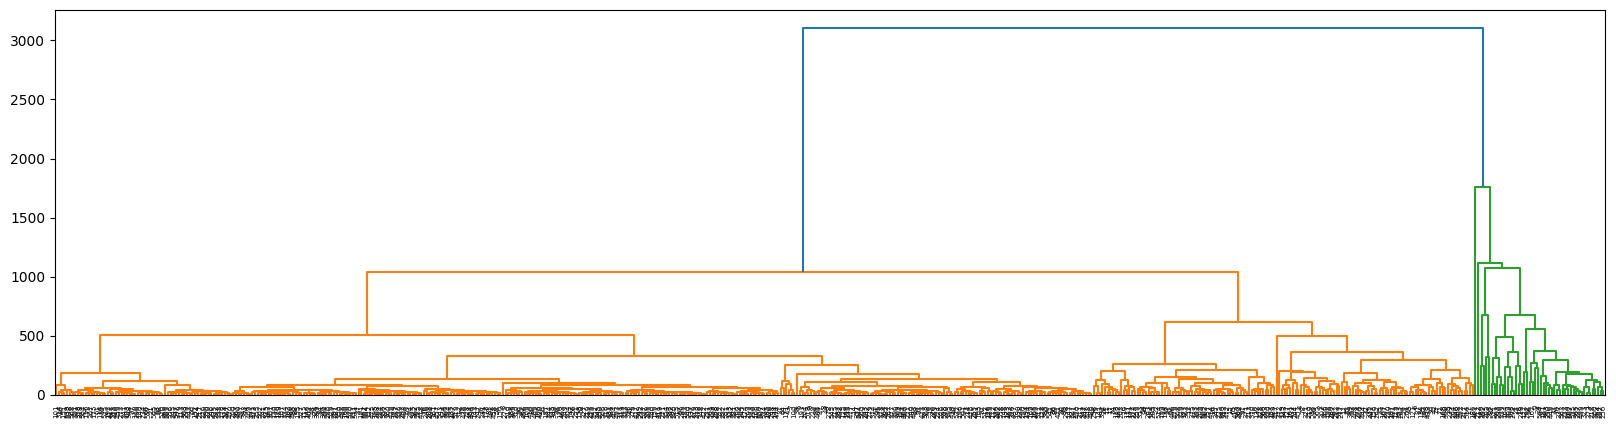

avg ri  0.7367694744919471
avg ri  0.7719869303695645


In [20]:
data = load_breast_cancer()
data.target[[10, 50, 85]]
list(data.target_names)

print(len(data))
N=569

#Random
labelrand = data.target
ag = np.zeros(N)
for runs in range(N):
    pred=np.random.randint(0,3,N)
    tp=0
    tn=0
    for i in range(N):
        for j in range(i+1,N):
                tp= tp +((pred[i]==pred[j]) and (labelrand[i]==labelrand[j]))
                tn= tn +((pred[i]!=pred[j]) and (labelrand[i]!=labelrand[j]))
    ri=2*(tp + tn)/(N*(N-1))
    #avg=avg+ri
    ag [runs] = ri
print('avg ri ',sum(ag)/N) #ri should be close to 0.6
#print(ag)
ag_random = sum(ag)/N



#Hierarchical
label = data.target
Z = linkage(data.data, 'weighted')
fig = plt.figure(figsize=(20, 5))
dn = dendrogram(Z)
plt.show()
fcluster(Z, t=3, criterion='maxclust')

ag = np.zeros(N)
for runs in range(N):
     Z = linkage(data.data, 'complete')
     pred = fcluster(Z, t=4, criterion='maxclust')
     tp=0
     tn=0
     for i in range(N):
         for j in range(i+1,N):
                 tp= tp +((pred[i]==pred[j]) and (label[i]==label[j]))
                 tn= tn +((pred[i]!=pred[j]) and (label[i]!=label[j]))
     ri=2*(tp + tn)/(N*(N-1))
     #print('tp ',tp,' tn ',tn,' ri ',ri)
     #avg=avg+ri
     ag [runs] = ri
print('avg ri ',sum(ag)/N)
#print(ag)
ag_hierarchy = sum(ag)/N


#Partitional
label = data.target
ag = np.zeros(N)
for runs in range(N):
    pred=KMeans(n_clusters=3, random_state=0).fit(data.data)
    tp=0
    tn=0
    for i in range(N):
        for j in range(i+1,N):
            if(j):
                tp= tp +((pred.labels_[i]==pred.labels_[j]) and (label[i]==label[j]))
                tn= tn +((pred.labels_[i]!=pred.labels_[j]) and (label[i]!=label[j]))
    ri=2*(tp + tn)/(N*(N-1))
    #avg=avg+ri
    ag [runs] = ri
print('avg ri ',sum(ag)/N)
#print(ag)
ag_partitional = sum(ag)/N